
**# Table of Contents**
0. Data OverView
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)

# **0. Data OverView**

In [13]:
'''
데이터 분석 라이브러리 : pandas와 numpy
pandas : 데이터 분석 라이브러리. 데이터 조작, 정제, 분석, 시각화 등을 위한 다양한 기능을 제공. 시리즈(Series)와 데이터프레임(DataFrame)이라는 자료형을 이용하여 데이터를 처리
numpy : 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 지원하는 파이썬의 패키지. 데이터 분석을 할 때, pandas와 함께 자주 사용

데이터 시각화 라이브러리 : matplotlib와 seaborn
matplotlib.pyplot : matlab과 비슷하게 명령어 스타일로 동작하는 함수의 모음. 모듈의 각각의 함수를 사용해서 간편하게 그래프를 만들고 변화를 줄 수 있음.
seaborn : matplotlib 대비 손쉽게 그래프를 그리고 그래프 스타일 설정을 할 수 있음.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import sys

# Download latest version
path = kagglehub.dataset_download("octopusteam/full-netflix-dataset")# 경로 입력
print("Path to dataset files:", path)# 경로 프린트
df = pd.read_csv("../" + path + "/data.csv")# 데이터프레임 생성
df.head()# 데이터프레임의 제일 위 5행을 보여줌

Path to dataset files: /root/.cache/kagglehub/datasets/octopusteam/full-netflix-dataset/versions/52


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,518462.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1225867.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,212298.0,"AD, AE, AG, AL, AO, AT, AZ, BA, BG, BH, BM, BR..."
3,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,445589.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1110118.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


# **1. Data Cleaning and Preprocessing**

In [14]:
'''
pandas.isnull() : 관측치가 결측(NaN/Null)이면 True, 아니라면 False를 반환
입력값 : scalar or array-like
리턴값 : bool or array-like of bool
pandas.sum() : 객체의 행이나 열의 합을 계산. True는 1, False는 0 이므로 (sum의 값 = 결측의 개수)
'''

# 결손값 확인
df.isnull().sum()

,0
title,514
type,0
genres,267
releaseYear,14
imdbId,1299
imdbAverageRating,1448
imdbNumVotes,1448
availableCountries,0


,0
title,514
type,0
genres,267
releaseYear,14
imdbId,1299
imdbAverageRating,1448
imdbNumVotes,1448
availableCountries,0


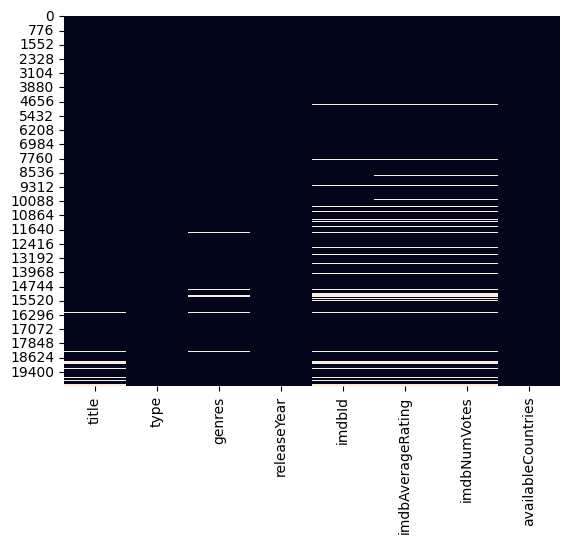

In [15]:
'''
seaborn.heatmap() : 히트맵으로 데이터를 시각화하면 결측치가 있는 곳에서 2개 이상의 열에 상관관계가 있으면 데이터의 상관관계를 직관적으로 알 수 있음.
pandas.isna() == pandas.isnull()
'''

# 결측값 처리 방법에는 평균값/중앙값 대체, 0으로 대체, 삭제 등 여러 방법이 존재함.
# 본 데이터의 결측값에는 다음과 같은 특징이 있음

# 평점이 기입되지 않은 데이터는, 추천수도 존재하지 않는다.
# 다른 열에 결측값이 발생한 경우, 모두 평점이 결측값을 가진 것으로 확인된다.

# 결측값이 모여있다는 것이 확인됐으므로, 대체값 대신 결손값이 있는 행을 삭제하기로 함.

sns.heatmap(df.isnull(), cbar = False) # 시각화
df[df.imdbAverageRating.isna()].isnull().sum()# imdbAverageRating이 결측값을 가진경우만 뽑았는데, 모든 결측값이 이 데이터 프레임안에서 관측됨

- 결측값의 비율이 약 7.1%으로 상대적으로 적은 비율임.
- 결측값이 특정 행에 몰려있음.

이와 같은 이유로, 결측치를 삭제하기로 결정

In [16]:
# 1444개의 데이터가 소실됨.(약 7.5%)
'''
dropna() : 결측치 제거 함수, how=any : 존재하면 제거, inplace = True : 원본 변경
'''
df.dropna(how='any', inplace = True)
df.isnull().sum()

,0
title,0
type,0
genres,0
releaseYear,0
imdbId,0
imdbAverageRating,0
imdbNumVotes,0
availableCountries,0


In [17]:
# float를 int로 형변환
df = df.astype({'releaseYear' : 'int', 'imdbNumVotes' : 'int32'})

# **2. Exploratory Data Analysis (EDA)**

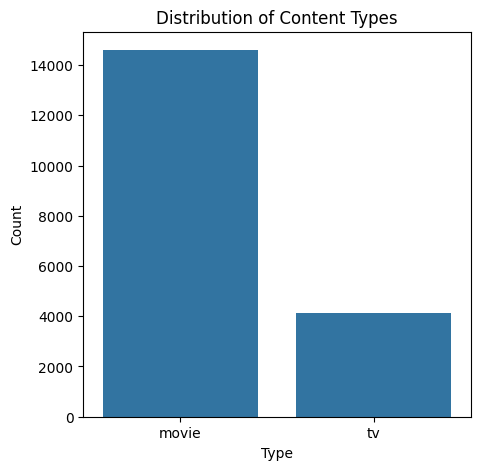

In [18]:
# 콘텐츠 타입 분포
plt.figure(figsize=(5, 5))# 그래프 틀 그리기
sns.countplot(data=df, x='type')# 그래프 종류 및 데이터 입력
plt.title('Distribution of Content Types') # 제목
plt.xlabel('Type') # X축 라벨
plt.ylabel('Count') # Y축 라벨
plt.show() # 그리기

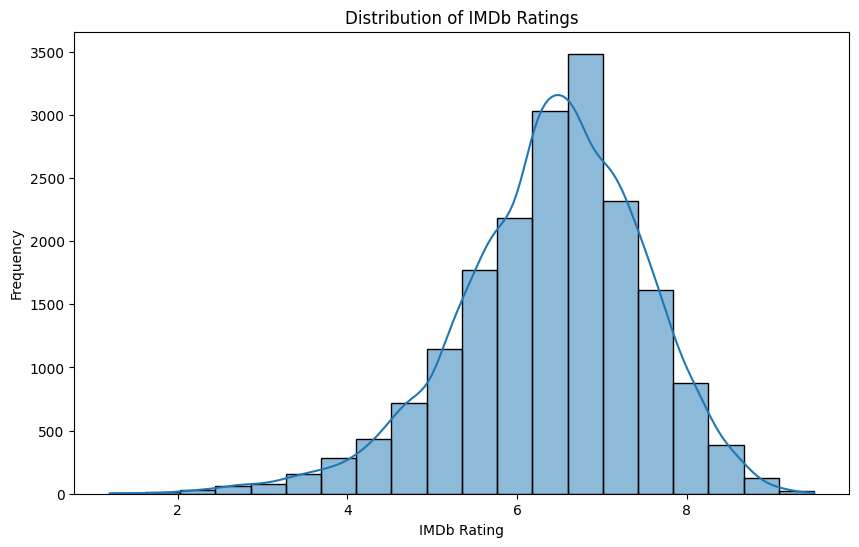

In [19]:
# 평점 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['imdbAverageRating'], bins=20, kde=True) # 그래프 종류 및 데이터 입력
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

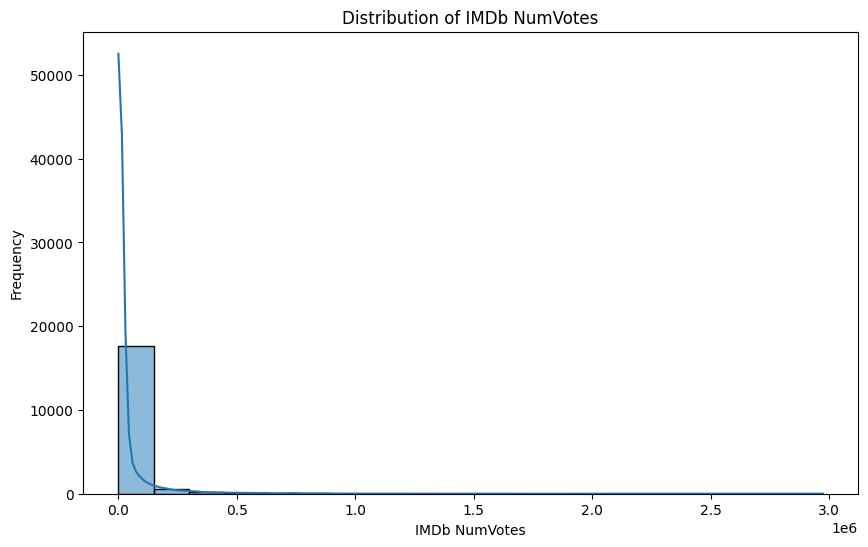

In [20]:
# 추천수 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['imdbNumVotes'], bins=20, kde=True)
plt.title('Distribution of IMDb NumVotes')
plt.xlabel('IMDb NumVotes')
plt.ylabel('Frequency')
plt.show()

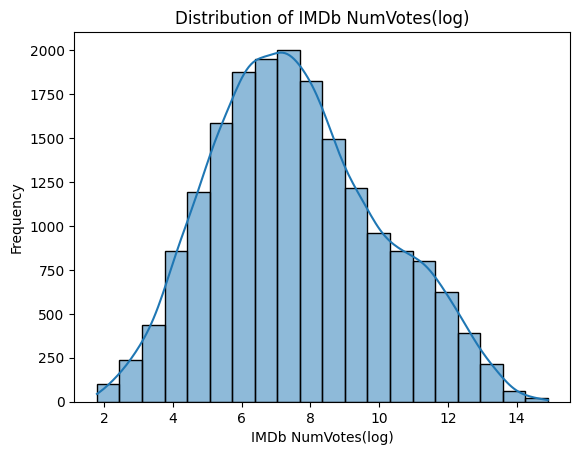

In [21]:
'''
추천수의 분포가 굉장히 좌측으로 몰려있음. 즉, 데이터의 불균형이 발생함. 데이터의 불균형은 여러 문제를 초래함.
위의 그래프는 추천수가 적은 영화가 훨씬 많은데, 이러한 경우 추천수가 많은 영화에 대한 예측이 부정확해질 수 있음.
따라서 로그 변환을 통해 추천수의 분포를 완만하게 조정하여 과도한 가중치 부여를 방지함.
'''

df['imdbNumVotes'] = np.log1p(df['imdbNumVotes']) # 밑이 e인 자연로그 log(1+x)로 변경
sns.histplot(df['imdbNumVotes'], bins=20, kde=True) # 그래프 종류 및 데이터 입력
plt.title('Distribution of IMDb NumVotes(log)') # 제목
plt.xlabel('IMDb NumVotes(log)') # X축 라벨
plt.ylabel('Frequency') # Y축 라벨
plt.show() # 그리기

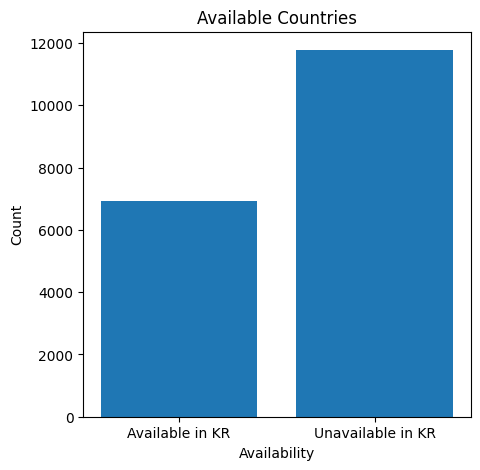

In [22]:
# 한국 시청 지원 여부
krFilter = df['availableCountries'].str.contains("KR")
kr = df[krFilter]
notKr = df[~krFilter]
plt.figure(figsize=(5, 5))
plt.xticks([0, 1], ['Available in KR', 'Unavailable in KR'])
plt.bar([0, 1], [len(kr), len(notKr)])
plt.title('Available Countries')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.show()

한국에서 지원하는 영화만 선별

In [23]:
kr.to_csv("netflix.csv", header = False, index = False)

# 중복 기록 제거
kr_cleaned = kr.drop_duplicates(subset=kr.columns[0:1], keep='first')

# 파일 저장
kr_cleaned.to_csv("netflix.csv", index=False)

In [24]:
assert sys.version_info >= (3, 7)

In [27]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [28]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [29]:
# 업로드한 파일 사용
data = pd.read_csv("netflix.csv")
data['genres'] = data['genres'].str.replace(',', '')

In [30]:
# 데이터를 올바르게 불러왔는지 확인
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6829 entries, 0 to 6828
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               6829 non-null   object 
 1   type                6829 non-null   object 
 2   genres              6829 non-null   object 
 3   releaseYear         6829 non-null   int64  
 4   imdbId              6829 non-null   object 
 5   imdbAverageRating   6829 non-null   float64
 6   imdbNumVotes        6829 non-null   float64
 7   availableCountries  6829 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 426.9+ KB
None


### ***Collaborative Filtering***

superise 라이브러리 설치

In [31]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357289 sha256=107a467d2211d907e8cb8e7920ae81cd5488a6f865afe739a4eb67fa2e582d2f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [35]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

In [32]:
import surprise
print(surprise.__version__)

1.1.4


영화 데이터 준비

In [33]:
# 'title' -> 영화 제목, 'imdbAverageRating' -> 가상의 평점으로 사용
data_for_cf = data[['title', 'imdbAverageRating']].copy()
data_for_cf['user_id'] = [f"user_{i%10}" for i in range(len(data_for_cf))]  # 10명의 사용자 생성
data_for_cf.rename(columns={'title': 'item_id', 'imdbAverageRating': 'rating'}, inplace=True)

In [36]:
# Surprise 라이브러리를 위한 데이터셋 형식 변환
reader = Reader(rating_scale=(0, 10))  # IMDb 평점 범위
dataset = Dataset.load_from_df(data_for_cf[['user_id', 'item_id', 'rating']], reader)


In [38]:
# SVD 모델 생성 및 평가
svd = SVD()
cross_validate(svd, dataset, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0568  1.0431  1.0407  1.0673  1.0300  1.0476  0.0131  
MAE (testset)     0.8244  0.8234  0.8140  0.8303  0.8013  0.8187  0.0101  
Fit time          0.10    0.11    0.09    0.10    0.10    0.10    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([1.05684246, 1.04311525, 1.0406887 , 1.06729293, 1.02996251]),
 'test_mae': array([0.82442699, 0.82337714, 0.81401503, 0.83026091, 0.80133144]),
 'fit_time': (0.09695100784301758,
  0.11245942115783691,
  0.09354186058044434,
  0.10153698921203613,
  0.10453009605407715),
 'test_time': (0.006262779235839844,
  0.005534172058105469,
  0.005391836166381836,
  0.005586147308349609,
  0.005387306213378906)}

est_rmse (Root Mean Squared Error):

예측 값과 실제 평점 간의 차이의 제곱 평균의 제곱근입니다.
값이 작을수록 모델의 예측이 더 정확하다는 것을 의미합니다.
예: RMSE = 0.85라면 평균적으로 약 0.85점 차이가 난다는 뜻입니다.

test_mae (Mean Absolute Error):

예측 값과 실제 값 간의 차이의 절대값 평균입니다.
값이 작을수록 더 나은 모델입니다.
예: MAE = 0.70이라면 평균적으로 0.70점의 오차가 있다는 뜻입니다.

1.1 RMSE (Root Mean Squared Error)
Fold별 RMSE:
Fold 1: 1.0467
Fold 2: 1.0115
Fold 3: 1.0633
Fold 4: 1.0385
Fold 5: 1.0786
Mean (평균 RMSE): 1.0477
Std (표준 편차): 0.0228
해석:

RMSE는 예측 평점과 실제 평점 간의 평균적인 오차를 나타냅니다.
평균 RMSE가 1.0477이라는 것은, 모델의 평점 예측이 약 1.05점 정도의 오차를 가지고 있음을 의미합니다.
표준 편차(0.0228)가 작기 때문에, 5개의 Fold 결과가 비교적 안정적이라고 볼 수 있습니다.

1.2 MAE (Mean Absolute Error)
Fold별 MAE:
Fold 1: 0.8175
Fold 2: 0.7962
Fold 3: 0.8312
Fold 4: 0.8058
Fold 5: 0.8464
Mean (평균 MAE): 0.8194
Std (표준 편차): 0.0178
해석:

MAE는 예측과 실제 평점 간의 절대적인 차이를 나타냅니다.
평균 MAE가 0.8194라는 것은, 모델의 예측이 약 0.82점 정도의 오차를 가지고 있음을 나타냅니다.



In [39]:
# 모델 학습
trainset = dataset.build_full_trainset()
svd.fit(trainset)

In [40]:
# 영화 추천 함수
def recommend_movies_cf(user_id, top_n=5):
    # 모든 영화에 대해 예측 점수 계산
    movies = data['title'].unique()
    predictions = [svd.predict(user_id, movie) for movie in movies]

    # 예측 점수 기준으로 정렬하여 상위 top_n 추천
    predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    top_movies = predictions[:top_n]

    # 추천 영화 반환
    recommended_movies = [pred.iid for pred in top_movies]
    return data[data['title'].isin(recommended_movies)]

# 예시 사용자에 대한 영화 추천
recommended_cf = recommend_movies_cf('user_0')
print("협업 필터링 추천 영화 목록:")
print(recommended_cf)

협업 필터링 추천 영화 목록:
                                 title   type                     genres  \
20          Terminator 2: Judgment Day  movie    Action Adventure Sci-Fi   
4400                           Top Boy     tv       Crime Drama Thriller   
4640                          Doraemon     tv     Animation Comedy Drama   
4690  Secrets of Great British Castles     tv        Documentary History   
6350     Frieren: Beyond Journey's End     tv  Adventure Animation Drama   

      releaseYear      imdbId  imdbAverageRating  imdbNumVotes  \
20           1991   tt0103064                8.6     14.003607   
4400         2011   tt1830379                8.4     10.657683   
4640         2005   tt4083422                8.4      8.385489   
4690         2015   tt5181284                7.7      7.152269   
6350         2023  tt22248376                8.9     10.267992   

                                     availableCountries  
20    AD, AE, AO, AR, AU, BE, BH, BO, BR, BZ, CA, CH...  
4400  AD, AE,

# ***Content Based Filtering***

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

**TF-IDF 벡터화 하여 유사도 계산**

In [42]:
# 'genres' 열에 대해 TF-IDF 벡터화 적용
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['genres'])

# 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")


TF-IDF Matrix Shape: (6829, 28)


**교차 검증 및 하이퍼파라미터 설정**

In [43]:
# RMSE 평가 함수
def calculate_rmse(similarity_matrix, true_values):
    true_sim = np.diag(similarity_matrix)
    return np.sqrt(np.mean((true_values - true_sim) ** 2))

# 데이터를 교차 검증하며 평가
def cross_validate_tfidf(data, params, n_splits=5):
    # K-폴드 교차 검증 설정
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = []

    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        # TF-IDF 벡터화
        vectorizer = TfidfVectorizer(**params)
        tfidf_train = vectorizer.fit_transform(train_data['genres'])
        tfidf_test = vectorizer.transform(test_data['genres'])

        # 코사인 유사도 계산
        train_sim = cosine_similarity(tfidf_train, tfidf_train)
        test_sim = cosine_similarity(tfidf_test, tfidf_train)

        # RMSE 계산
        rmse = calculate_rmse(test_sim, np.ones(test_sim.shape[0]))
        results.append(rmse)

    return np.mean(results)

# 하이퍼파라미터 설정
param_grid = {
    'max_features': [500, 1000, 1500],
    'ngram_range': [(1, 1), (1, 2)],
    'stop_words': [None, 'english']
}

# 하이퍼파라미터 튜닝 결과 저장
best_params = None
best_rmse = float('inf')

for max_features in param_grid['max_features']:
    for ngram_range in param_grid['ngram_range']:
        for stop_words in param_grid['stop_words']:
            params = {
                'max_features': max_features,
                'ngram_range': ngram_range,
                'stop_words': stop_words
            }
            rmse = cross_validate_tfidf(data, params)
            print(f"Params: {params}, RMSE: {rmse:.4f}")
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = params

print("\n최적 하이퍼파라미터:", best_params)
print("최적 RMSE:", best_rmse)

Params: {'max_features': 500, 'ngram_range': (1, 1), 'stop_words': None}, RMSE: 0.8649
Params: {'max_features': 500, 'ngram_range': (1, 1), 'stop_words': 'english'}, RMSE: 0.8649
Params: {'max_features': 500, 'ngram_range': (1, 2), 'stop_words': None}, RMSE: 0.9219
Params: {'max_features': 500, 'ngram_range': (1, 2), 'stop_words': 'english'}, RMSE: 0.9219
Params: {'max_features': 1000, 'ngram_range': (1, 1), 'stop_words': None}, RMSE: 0.8649
Params: {'max_features': 1000, 'ngram_range': (1, 1), 'stop_words': 'english'}, RMSE: 0.8649
Params: {'max_features': 1000, 'ngram_range': (1, 2), 'stop_words': None}, RMSE: 0.9219
Params: {'max_features': 1000, 'ngram_range': (1, 2), 'stop_words': 'english'}, RMSE: 0.9219
Params: {'max_features': 1500, 'ngram_range': (1, 1), 'stop_words': None}, RMSE: 0.8649
Params: {'max_features': 1500, 'ngram_range': (1, 1), 'stop_words': 'english'}, RMSE: 0.8649
Params: {'max_features': 1500, 'ngram_range': (1, 2), 'stop_words': None}, RMSE: 0.9219
Params: {'m

In [44]:
# 데이터 초기화
data['imdbAverageRating'] = pd.to_numeric(data['imdbAverageRating'], errors='coerce')

#장르 목록 생성
available_genres = sorted(set(" ".join(data['genres']).split()))
rows = 3
genres_per_row = (len(available_genres) + rows - 1) // rows
genre_rows = [available_genres[i:i + genres_per_row] for i in range(0, len(available_genres), genres_per_row)]

In [45]:
# 장르 목록 출력
def display_genres():
    print()
    print("장르 목록:")
    for row in genre_rows:
        print("  ".join(f"{genre:<15}" for genre in row))
    print()

In [46]:
# 영화 검색
def search_movies():
    while True:
        # 검색 옵션 선택
        search_option = get_search_option()

        # 검색 수행
        if search_option == '1':
            recommended_movies = search_by_genre()
        elif search_option == '2':
            recommended_movies = search_by_title()
        else:
            print("잘못된 입력입니다. 다시 시도하세요.")
            continue

        # 검색 결과 출력
        if not recommended_movies.empty:
            display_search_results(recommended_movies)
        else:
            print("검색 결과가 없습니다.")

        # 다시 검색 여부 확인
        if not retry_search():
            print("검색을 종료합니다.")
            break

# 사용자의 검색어를 입력받음
def get_search_option():
    print("검색 옵션:")
    print("1. 장르로 검색")
    print("2. 제목으로 검색")
    return input("선택 (1 또는 2): ").strip()

# 장르 기반 검색
def search_by_genre():
    display_genres()
    user_genre = input("장르 선택: ").strip().capitalize()
    genre_idx = vectorizer.transform([user_genre])
    cosine_similarities = tfidf_matrix.dot(genre_idx.T).toarray().flatten()
    return data.loc[cosine_similarities > 0]

# 제목 기반 검색
def search_by_title():
    user_title = input("영화 제목 입력: ").strip().lower()
    return data[data['title'].str.lower().str.contains(user_title, na=False)]

# 검색 결과 페이지 단위 출력
def display_search_results(recommended_movies):
    sorted_movies = recommended_movies.sort_values(by='imdbAverageRating', ascending=False)
    page_size = 10
    total_pages = (len(sorted_movies) + page_size - 1) // page_size
    current_page = 0

    while current_page < total_pages:
        start_idx = current_page * page_size
        end_idx = start_idx + page_size
        movies_to_display = sorted_movies.iloc[start_idx:end_idx]

        print(f"\n검색 결과 (평점 높은 순): Page {current_page + 1}/{total_pages}")
        for _, row in movies_to_display.iterrows():
            print_movie_details(row)

        if current_page + 1 >= total_pages:
            print("마지막 페이지 입니다.")
            break

        if not next_page_prompt():
            break
        current_page += 1

# 영화 세부 정보 출력
def print_movie_details(movie):
    print()
    print(f"제목: {movie['title']}")
    print(f"장르: {movie['genres']}")
    print(f"연도: {movie['releaseYear']}")
    print(f"평점: {movie['imdbAverageRating']}")

# 다음 페이지 조회 여부 확인
def next_page_prompt():
    user_input = input("\n다음 페이지를 보시겠습니까? (y/n): ").strip().lower()
    return user_input == 'y'

# 재검색 여부 확인
def retry_search():
    retry = input("\n다시 검색하시겠습니까? (y/n): ").strip().lower()
    return retry == 'y'


In [47]:
# 검색 시작
search_movies()

검색 옵션:
1. 장르로 검색
2. 제목으로 검색
선택 (1 또는 2): 1

장르 목록:
Action           Adventure        Animation        Biography        Comedy           Crime            Documentary      Drama            Family         
Fantasy          Game-Show        History          Horror           Music            Musical          Mystery          News             Reality-TV     
Romance          Sci-Fi           Short            Sport            Talk-Show        Thriller         War              Western        

장르 선택: Action

검색 결과 (평점 높은 순): Page 1/133

제목: Avatar: The Last Airbender
장르: Action Adventure Animation
연도: 2005
평점: 9.3

제목: Shasha and Milo
장르: Action Animation Comedy
연도: 2023
평점: 9.2

제목: Attack on Titan
장르: Action Adventure Animation
연도: 2013
평점: 9.1

제목: Arcane
장르: Action Adventure Animation
연도: 2021
평점: 9.0

제목: One Piece
장르: Action Adventure Animation
연도: 1999
평점: 9.0

제목: Hunter x Hunter
장르: Action Adventure Animation
연도: 2011
평점: 9.0

제목: The Dark Knight
장르: Action Crime Drama
연도: 2008
평점: 9.

비교

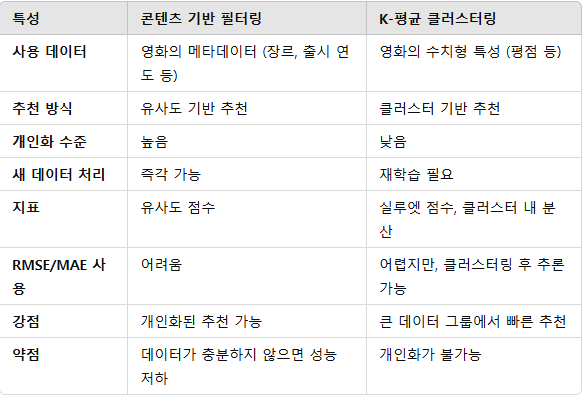

개인화된 추천이 중요하다면 콘텐츠 기반 필터링이 적합합니다.
속도와 확장성이 중요한 대규모 데이터셋에서는 K-평균이 유리할 수 있습니다.

개인화 된 추천이 필요하기 때문에 Content based Filtering 이 적합합니다.